# Image Editing

Google's new Gemini 2.5 Flash Image model `google/gemini-2.5-flash-image-preview` is a SOTA image generation model capable of image generation and editing. In this notebook we will explore its editing capabilities. We will input an images+text and request an image back.

Basic examples on how to use `irouter` with image input are in the `img.ipynb` notebook. Here we will use image input purely for editing. Note that `irouter` accepts both local image paths and image URL as input.

In [1]:
from irouter import Call
from IPython.display import Image, display

# To load OPENROUTER_API_KEY with dotenv, create a .env file with OPENROUTER_API_KEY=your_api_key
# Alternatively pass api_key=your_openrouter_api_key to the Chat class
from dotenv import load_dotenv

load_dotenv();

At this moment a preview of Gemini 2.5 Flash Image is available for free (with low rate limits). When using the model in production remove `:free` from the model name.

In [2]:
c = Call("google/gemini-2.5-flash-image-preview:free")

## Single image

For this example we will use an image of a puppy with one ear down. We will give the model instructions to make both ears stand up.

In [3]:
puppy_path = "../../assets/puppy.jpg"
display(Image(url=puppy_path, width=300))

By default, `irouter` will return only the string content, so its important to set `raw=True` to get the raw response from the API, which includes image content.

In [4]:
r = c([puppy_path, "Please make both puppy ears stand up."], raw=True)

Besides the message, we also parse the image content.

In [5]:
msg = r.choices[0].message
msg.content

"Okay, I can make both of the puppy's ears stand up for you! Here is the revised image: \n"

In [6]:
img = msg.images[0]["image_url"]["url"]
img[:50]

'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABOAA'

And there it is! The model correctly editing our puppy image so both ears stand up.


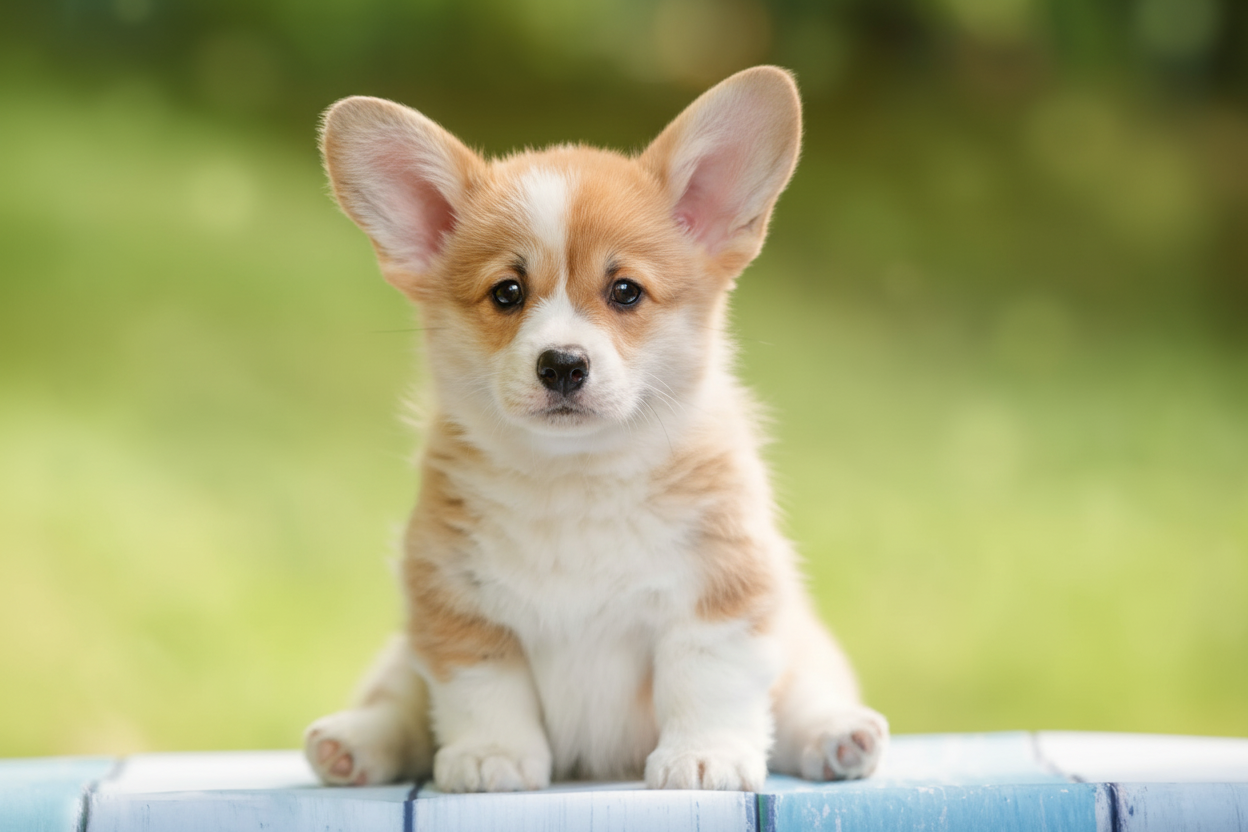

In [7]:
display(Image(url=img, width=300))

## Multiple images

`irouter` accepts both local image paths and image URLs. Here we will add an image of a kitten to the prompt and see if Gemini 2.5 Flash Image can put the two animals together in a single image.


In [8]:
kitten_url = "https://images.ctfassets.net/sfnkq8lmu5d7/1NaIFGyBn0qwXYlNaCJSEl/ad59ce5eefa3c2322b696778185cc749/2021_0825_Kitten_Health.jpg?w=1000&h=750&fl=progressive&q=70&fm=jpg"
display(Image(url=kitten_url, width=300))

In [9]:
r = c(
    [
        kitten_url,
        puppy_path,
        "Please put the kitten and puppy together in a single image. Put both animals in the puppy's environment and make sure they make it look natural like the really were together in the photo.",
    ],
    raw=True,
)

In [10]:
msg = r.choices[0].message
msg.content

"No problem! Here's a single image of the kitten and puppy together, naturally situated in the puppy's environment:\n\n"

In [11]:
img = msg.images[0]["image_url"]["url"]
img[:50]

'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABOAA'


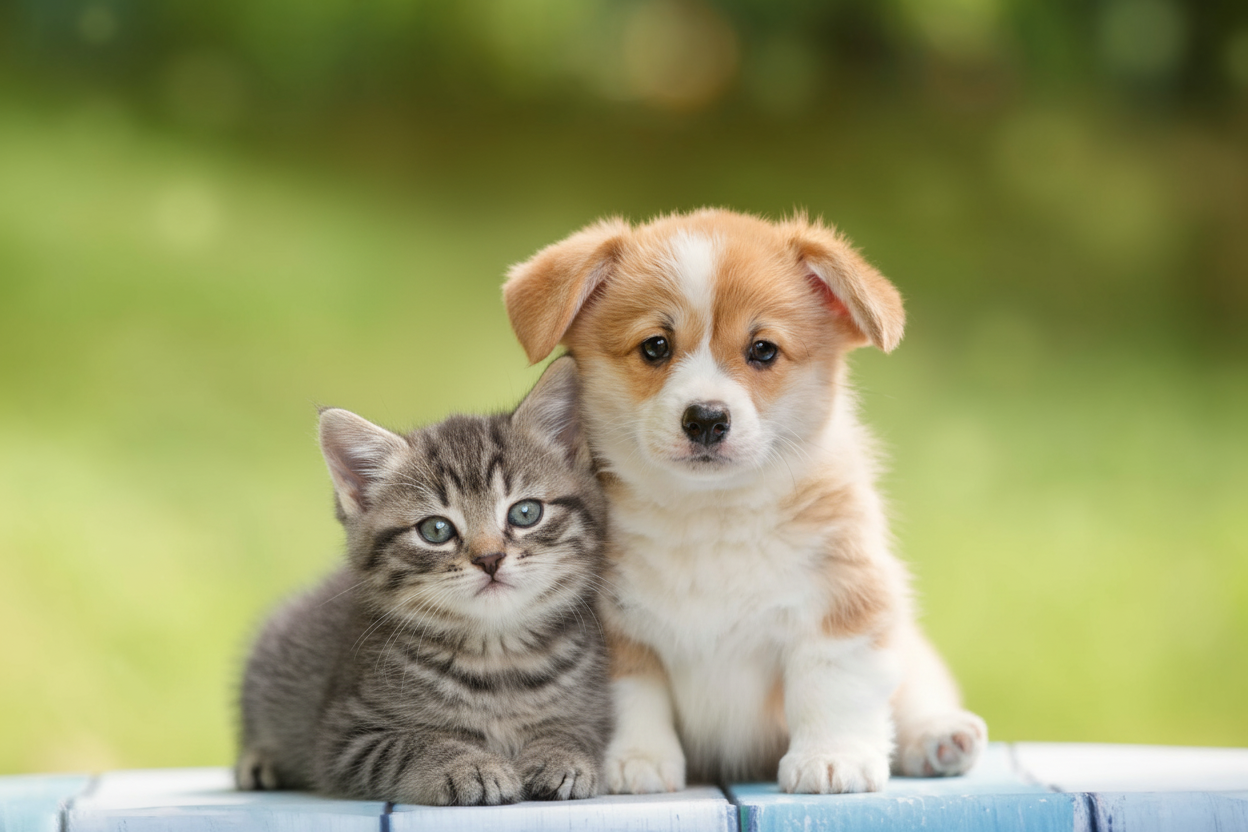

In [12]:
display(Image(url=img, width=300))